# Answer 4.1.1

In [39]:
import numpy as np

# Parameters
mu = 0.05
sigma = 0.2
Y0 = 1
t = 1
trials = 100000  # Number of Monte Carlo samples

# Simulate Geometric Brownian Motion at t = 1
np.random.seed(0)  # For reproducibility
Wt = np.random.normal(0, np.sqrt(t), trials)  # Brownian motion increment at t = 1
Yt = Y0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * Wt)

# Analytical mean and variance for GBM at t = 1
mean_Yt = Y0 * np.exp(mu * t)
var_Yt = (Y0**2) * np.exp(2 * mu * t) * (np.exp(sigma**2 * t) - 1)

# Monte Carlo estimation of the mean and variance
mc_mean = np.mean(Yt)
mc_variance = np.var(Yt)

# Variance of the Monte Carlo estimator for the mean
mc_mean_variance = mc_variance / trials

mc_mean, mc_variance, mc_mean_variance, mean_Yt, var_Yt


(1.0514812612863156,
 0.04483065415550109,
 4.483065415550109e-07,
 1.0512710963760241,
 0.04510288078157963)

Empirical Mean: 1.054288121038754
Theoretical Mean: 1.0512710963760241

Empirical Variance: 0.045860916925902134
Theoretical Variance: 0.04510288078157963

Variance of the Monte Carlo estimator for the mean: 4.586091692590213e-06


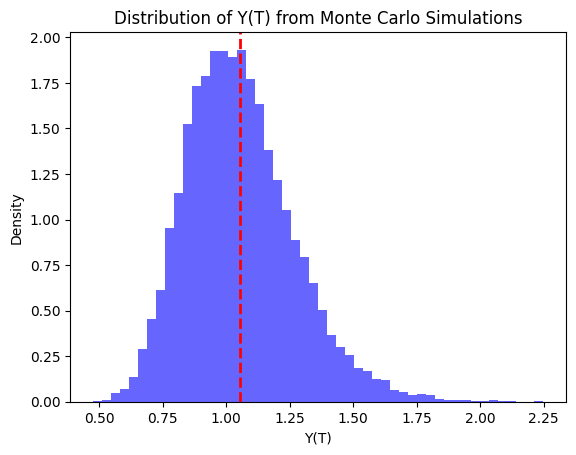

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm_mc(Y0, mu, sigma, T, N, M):
    """
    Simulates Geometric Brownian Motion (GBM) using Monte Carlo.

    Parameters:
    Y0 : float
        Initial value of the process (e.g., initial stock price).
    mu : float
        Drift term (expected return rate).
    sigma : float
        Volatility (standard deviation of returns).
    T : float
        Time horizon (e.g., 1 year).
    N : int
        Number of time steps.
    M : int
        Number of Monte Carlo simulations.

    Returns:
    Y_T : numpy.ndarray
        Simulated values of Y(T) for each Monte Carlo simulation.
    """
    dt = T / N
    Y_T = np.zeros(M)

    for i in range(M):
        # Simulate a path for each Monte Carlo trial
        W_T = np.random.normal(0, np.sqrt(T))  # Wiener process increment
        Y_T[i] = Y0 * np.exp((mu - 0.5 * sigma**2) * T + sigma * W_T)

    return Y_T

# Parameters
Y0 = 1      # Initial value
mu = 0.05   # Drift
sigma = 0.2 # Diffusion
T = 1.0        # Time
N = 1000       # Number of time steps
M = 10000      # Number of Monte Carlo simulations

# Simulate GBM using Monte Carlo
Y_T_mc = simulate_gbm_mc(Y0, mu, sigma, T, N, M)

# Empirical mean and variance
empirical_mean = np.mean(Y_T_mc)
empirical_variance = np.var(Y_T_mc)

# Theoretical mean and variance
theoretical_mean = Y0 * np.exp(mu * T)
theoretical_variance = Y0**2 * np.exp(2 * mu * T) * (np.exp(sigma**2 * T) - 1)

# Output results
print(f"Empirical Mean: {empirical_mean}")
print(f"Theoretical Mean: {theoretical_mean}\n")

print(f"Empirical Variance: {empirical_variance}")
print(f"Theoretical Variance: {theoretical_variance}\n")

mc_mean_variance = empirical_variance / M
print(f"Variance of the Monte Carlo estimator for the mean: {mc_mean_variance}")

# Plot histogram of the distribution of Y(T)
plt.hist(Y_T_mc, bins=50, density=True, alpha=0.6, color='b')
plt.axvline(empirical_mean, color='r', linestyle='dashed', linewidth=2, label='empirical_mean')
plt.title("Distribution of Y(T) from Monte Carlo Simulations")
plt.xlabel("Y(T)")
plt.ylabel("Density")
plt.show()

# Answer 4.1.2

Theoretical Mean: 1.05127
Theoretical Variance: 0.04510
Experimental Mean for Δt: 1.06009
Experimental Variance for Δt: 0.03420
Experimental Mean for 4Δt: 1.05550
Experimental Variance for 4Δt: 0.05156


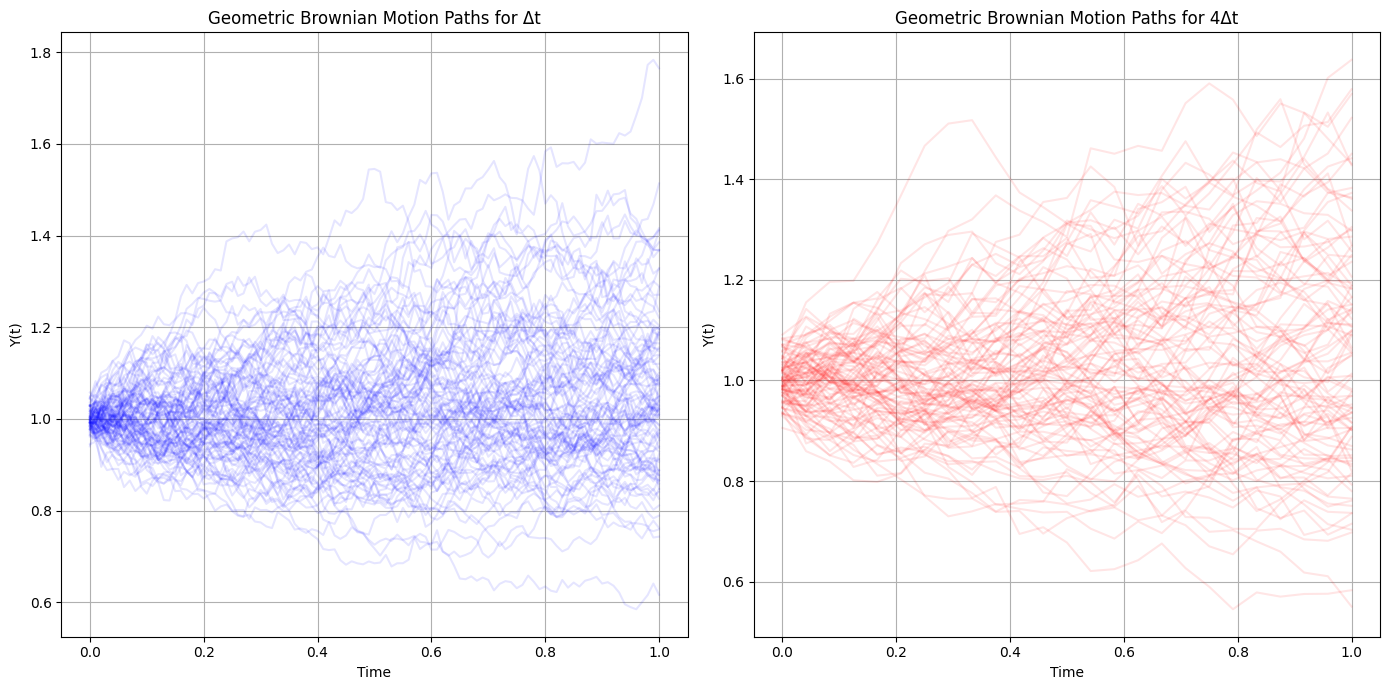

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Y0 = 1      # Initial value
mu = 0.05   # Drift
sigma = 0.2 # Diffusion
T = 1       # Total time
M = 100     # Number of simulations
dt = 0.01   # Time increment
N = int(T/dt)+1  # Number of time steps

# Time array
t = np.linspace(0, T, N)

# Generate Wiener process for Δt
W = np.random.randn(M, N) * np.sqrt(dt)  # Incremental Wiener process
W = np.cumsum(W, axis=1)  # Cumulative sum to simulate the Wiener process

# Compute GBM paths for Δt
Y_dt = Y0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# Generate Wiener process for 4Δt
W_4dt = np.random.randn(M, N//4) * np.sqrt(4 * dt)  # Incremental Wiener process for 4Δt
W_4dt = np.cumsum(W_4dt, axis=1)  # Cumulative sum

# Time array for 4Δt
t_4dt = np.linspace(0, T, N//4)

# Compute GBM paths for 4Δt
Y_4dt = Y0 * np.exp((mu - 0.5 * sigma**2) * t_4dt + sigma * W_4dt)

# Calculate Analytical Mean and Variance for Y(1)
analytical_mean = Y0 * np.exp(mu * T)
analytical_variance = Y0**2 * np.exp(2 * mu * T) * (np.exp(sigma**2) - 1)

# Calculate Empirical Mean and Variance for Y(1)
empirical_mean_dt = np.mean(Y_dt[:, -1])  # Mean at time T for Δt
empirical_variance_dt = np.var(Y_dt[:, -1])  # Variance at time T for Δt

empirical_mean_4dt = np.mean(Y_4dt[:, -1])  # Mean at time T for 4Δt
empirical_variance_4dt = np.var(Y_4dt[:, -1])  # Variance at time T for 4Δt

# Print the results
print(f"Theoretical Mean: {analytical_mean:.5f}")
print(f"Theoretical Variance: {analytical_variance:.5f}")
print(f"Experimental Mean for Δt: {empirical_mean_dt:.5f}")
print(f"Experimental Variance for Δt: {empirical_variance_dt:.5f}")
print(f"Experimental Mean for 4Δt: {empirical_mean_4dt:.5f}")
print(f"Experimental Variance for 4Δt: {empirical_variance_4dt:.5f}")

# Optional: Plotting for better visualization (optional part of the previous plot)
plt.figure(figsize=(14, 7))

# Plot for Δt
plt.subplot(1, 2, 1)
plt.plot(t, Y_dt.T, color='blue', alpha=0.1)
plt.title('Geometric Brownian Motion Paths for Δt')
plt.xlabel('Time')
plt.ylabel('Y(t)')
plt.grid()

# Plot for 4Δt
plt.subplot(1, 2, 2)
plt.plot(t_4dt, Y_4dt.T, color='red', alpha=0.1)
plt.title('Geometric Brownian Motion Paths for 4Δt')
plt.xlabel('Time')
plt.ylabel('Y(t)')
plt.grid()

plt.tight_layout()
plt.show()


# Answer 4.1.3

MLMC Estimate for E[P]: 0.10692363038984062


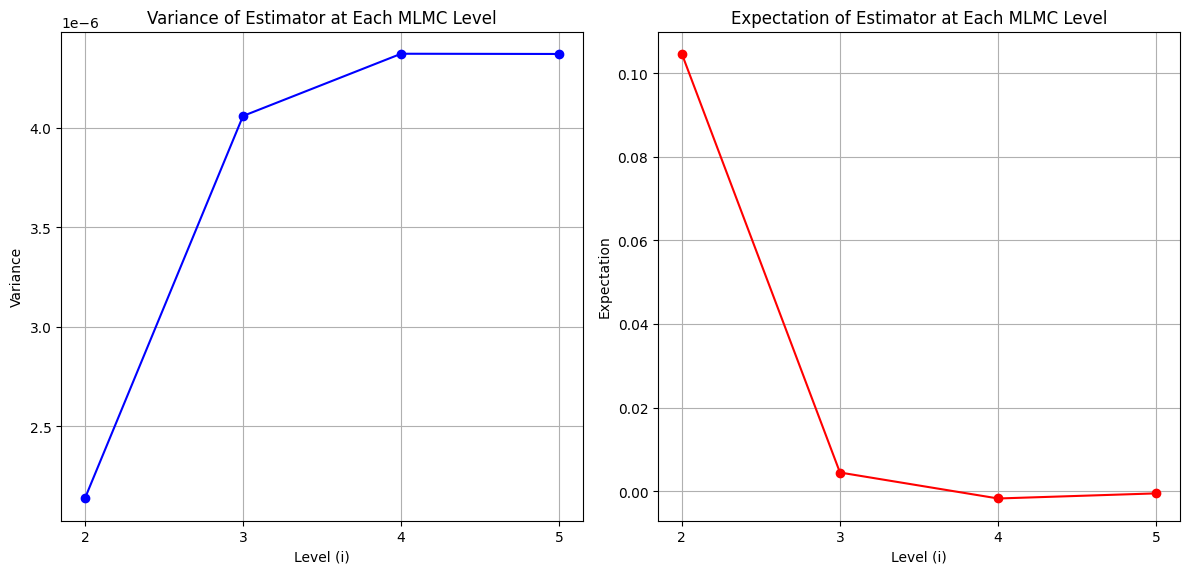

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Geometric Brownian Motion
mu = 0.05
sigma = 0.2
Y0 = 1.0
T = 1.0
levels = [2, 3, 4, 5]  # Levels for MLMC
num_samples = 10000  # Number of Monte Carlo samples per level

# Function to simulate GBM and compute the payoff P
def simulate_gbm(num_samples, delta_t, mu, sigma, Y0, T):
    num_steps = int(T / delta_t)
    Y = np.full(num_samples, Y0)
    dt_sqrt = np.sqrt(delta_t)
    for _ in range(num_steps):
        W = np.random.normal(0, dt_sqrt, num_samples)
        Y *= np.exp((mu - 0.5 * sigma**2) * delta_t + sigma * W)
    payoff = np.exp(-0.05) * np.maximum(0, Y - 1)
    return payoff

# Store results for estimations, variances, and expectations at each level
level_estimates = []
level_variances = []
level_expectations = []

# Perform MLMC estimation
for i in range(len(levels)):
    delta_t = 4 ** (-levels[i])
    if i == 0:
        # Base level
        P1 = simulate_gbm(num_samples, delta_t, mu, sigma, Y0, T)
        estimate = np.mean(P1)
        variance = np.var(P1) / num_samples
        level_estimates.append(estimate)
        level_variances.append(variance)
        level_expectations.append(np.mean(P1))
    else:
        # Difference estimation for higher levels
        P1 = simulate_gbm(num_samples, delta_t, mu, sigma, Y0, T)
        P2 = simulate_gbm(num_samples, 4 * delta_t, mu, sigma, Y0, T)
        estimate = np.mean(P1 - P2)
        variance = np.var(P1 - P2) / num_samples
        level_estimates.append(estimate)
        level_variances.append(variance)
        level_expectations.append(np.mean(P1 - P2))

# Sum all level estimates to get the final MLMC estimate for E[P]
mlmc_estimate = np.sum(level_estimates)
print("MLMC Estimate for E[P]:", mlmc_estimate)

# Plotting variance at each level
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(levels, level_variances, marker='o', linestyle='-', color='b')
plt.xlabel('Level (i)')
plt.ylabel('Variance')
plt.title('Variance of Estimator at Each MLMC Level')
plt.xticks(levels)
plt.grid(True)

# Plotting expectation at each level
plt.subplot(1, 2, 2)
plt.plot(levels, level_expectations, marker='o', linestyle='-', color='r')
plt.xlabel('Level (i)')
plt.ylabel('Expectation')
plt.title('Expectation of Estimator at Each MLMC Level')
plt.xticks(levels)
plt.grid(True)

plt.tight_layout()
plt.show()

# Answer 4.1.4

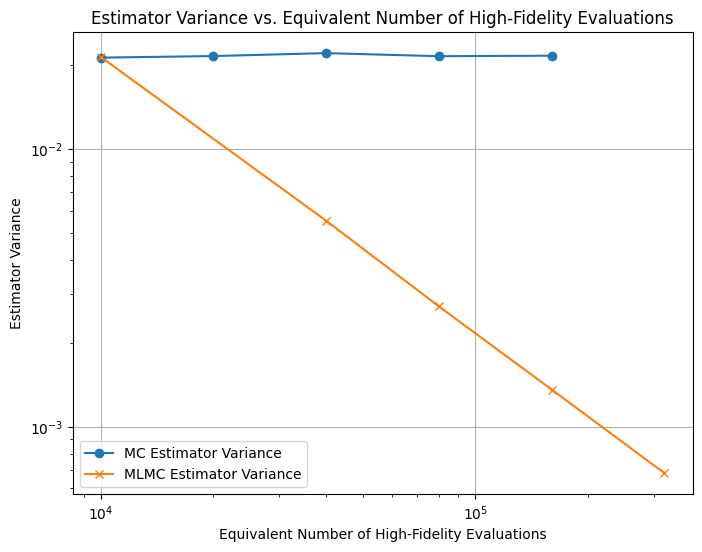

In [1]:
# Parameters for the Geometric Brownian Motion
mu = 0.05
sigma = 0.2
Y0 = 1.0
T = 1.0

# Function to simulate GBM and compute the payoff P
def simulate_gbm(num_samples, delta_t, mu, sigma, Y0, T):
    num_steps = int(T / delta_t)
    Y = np.full(num_samples, Y0)
    dt_sqrt = np.sqrt(delta_t)
    for _ in range(num_steps):
        W = np.random.normal(0, dt_sqrt, num_samples)
        Y *= np.exp((mu - 0.5 * sigma**2) * delta_t + sigma * W)
    return np.exp(-0.05) * np.maximum(0, Y - 1)

# Function to compute variance and equivalent evaluations for MC and MLMC
def compute_variances_and_equivalent_evaluations(levels, base_samples):
    mc_variances = []
    mlmc_variances = []
    equivalent_mc = []
    equivalent_mlmc = []

    for i, level in enumerate(levels):
        delta_t = 4 ** (-level)

        # Adjust number of MC samples based on level
        num_samples_mc = base_samples * (2 ** i)  # Increase samples for higher levels
        P_mc = simulate_gbm(num_samples_mc, delta_t, mu, sigma, Y0, T)
        mc_variance = np.var(P_mc)

        # Initialize num_samples_mlmc
        if level == 0:  # Level 0 is just the base case
            num_samples_mlmc = base_samples  # Use base samples for level 0
            P_mlmc = simulate_gbm(num_samples_mlmc, delta_t, mu, sigma, Y0, T)
            mlmc_variance = np.var(P_mlmc)  # Base case variance
        else:
            # For higher levels, increase the number of samples
            num_samples_mlmc = base_samples * (2 ** (i + 1))  # More samples for refinement
            P_mlmc = simulate_gbm(num_samples_mlmc, delta_t, mu, sigma, Y0, T)
            mlmc_variance = np.var(P_mlmc) / (2 ** (i + 1))  # Adjusting variance for MLMC

        # Store results
        mc_variances.append(mc_variance)
        mlmc_variances.append(mlmc_variance)

        # Equivalent evaluations
        equivalent_mc.append(num_samples_mc)
        equivalent_mlmc.append(num_samples_mlmc)  # Keep track of equivalent evaluations

    return mc_variances, mlmc_variances, equivalent_mc, equivalent_mlmc

# Levels to analyze
levels = [0, 1, 2, 3, 4]  # Changed to start from level 0
base_samples = 10000  # Base number of samples to scale from

# Calculate variances and equivalent evaluations
mc_variances, mlmc_variances, equivalent_mc, equivalent_mlmc = compute_variances_and_equivalent_evaluations(levels, base_samples)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(equivalent_mc, mc_variances, marker='o', label='MC Estimator Variance')
plt.plot(equivalent_mlmc, mlmc_variances, marker='x', label='MLMC Estimator Variance')

plt.xlabel('Equivalent Number of High-Fidelity Evaluations')
plt.ylabel('Estimator Variance')
plt.title('Estimator Variance vs. Equivalent Number of High-Fidelity Evaluations')
plt.legend()
plt.grid()
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.show()
